In [1]:
pip install MTCNN

     |████████████████████████████████| 2.3MB 4.3MB/s 


In [0]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN
import os
from glob import glob
import json

In [0]:
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
    count=0
    # load the image
    data = pyplot.imread(filename)
    # plot the image
    fig = pyplot.figure()
    ax = pyplot.subplot(111)
    pyplot.imshow(data)
    # get the context for drawing boxes
    #ax = pyplot.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, linewidth=2, color='red')
        # draw the box
        ax.add_patch(rect)
        count+=1
    # show the plot
    ax.set_title(filename)
    pyplot.show()
    directory='./'
    #fig.savefig(directory+os.path.basename(filename))
    print(filename+' '+str(count))
    return count

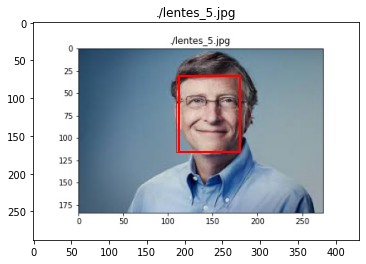

./lentes_5.jpg 1


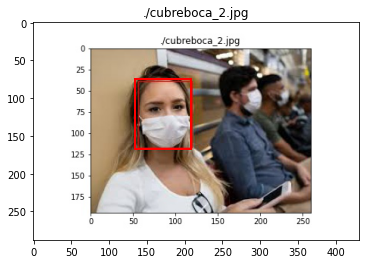

./cubreboca_2.jpg 1


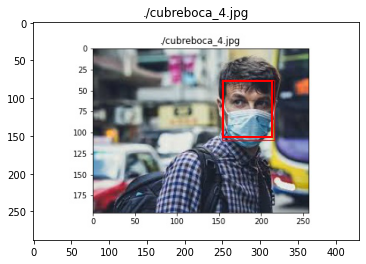

./cubreboca_4.jpg 1


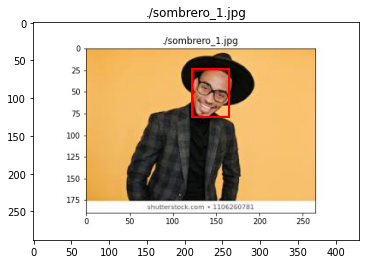

./sombrero_1.jpg 1


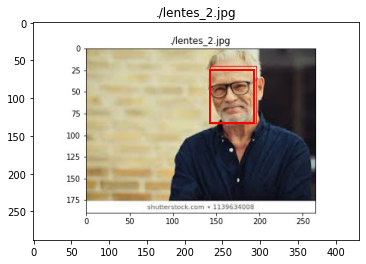

./lentes_2.jpg 1


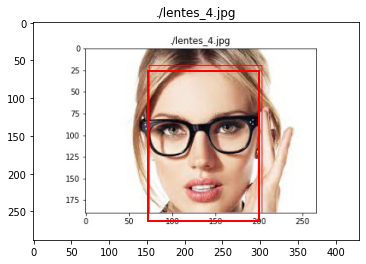

./lentes_4.jpg 1


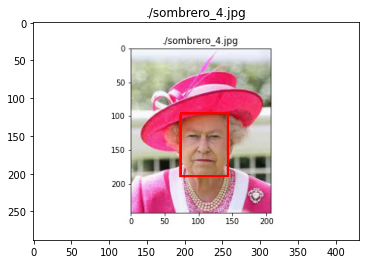

./sombrero_4.jpg 1


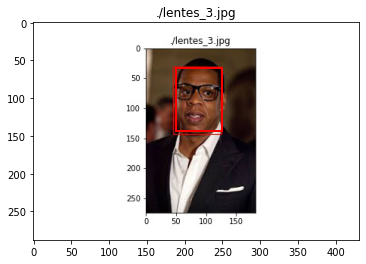

./lentes_3.jpg 1


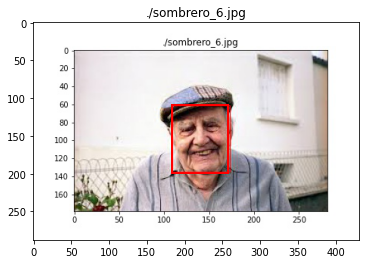

./sombrero_6.jpg 1


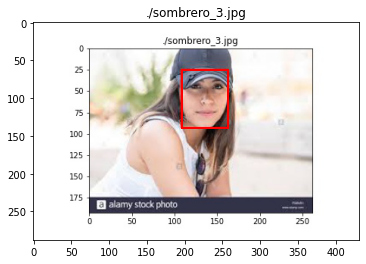

./sombrero_3.jpg 1


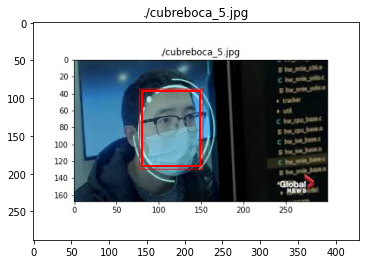

./cubreboca_5.jpg 1


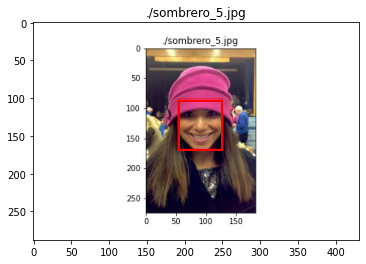

./sombrero_5.jpg 1


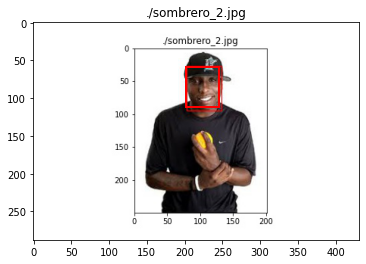

./sombrero_2.jpg 1


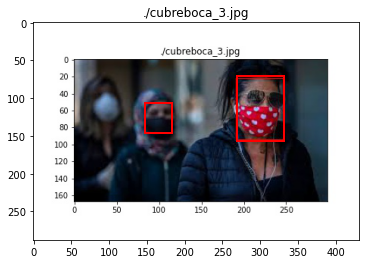

./cubreboca_3.jpg 2


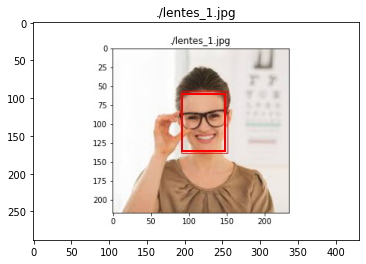

./lentes_1.jpg 1
Total 16


In [23]:
directory='./'
kind='*.jpg'
files=glob(directory+kind)
count=0
for filename in files:
    # load image from file
    pixels = pyplot.imread(filename)
    # create the detector, using default weights
    detector = MTCNN(scale_factor=.9,min_face_size=70)
    # detect faces in the image
    faces = detector.detect_faces(pixels)
    # display faces on the original image
    count+=draw_image_with_boxes(filename, faces)
print("Total "+str(count))

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib import patches
from io import BytesIO

import requests
from IPython.display import HTML

In [0]:
subscription_key = '46eca67ac7c748a798a3fe6f1a27ec13'
assert subscription_key

In [0]:
face_api_url = 'https://southcentralus.api.cognitive.microsoft.com/face/v1.0/detect'

In [0]:
headers = { 'Ocp-Apim-Subscription-Key': subscription_key,
            'Content-Type': 'application/octet-stream'}

params = {
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise',
}


Encontré rostro(s) en ./lentes_5.jpg
[{'faceId': '66859d2c-137f-4098-bdcd-bbcead6ea2a4', 'faceRectangle': {'top': 78, 'left': 191, 'width': 92, 'height': 92}, 'faceAttributes': {'smile': 0.991, 'headPose': {'pitch': 8.3, 'roll': 1.6, 'yaw': -0.3}, 'gender': 'male', 'age': 57.0, 'facialHair': {'moustache': 0.1, 'beard': 0.1, 'sideburns': 0.1}, 'glasses': 'ReadingGlasses', 'emotion': {'anger': 0.0, 'contempt': 0.009, 'disgust': 0.0, 'fear': 0.0, 'happiness': 0.991, 'neutral': 0.0, 'sadness': 0.0, 'surprise': 0.0}, 'blur': {'blurLevel': 'low', 'value': 0.0}, 'exposure': {'exposureLevel': 'goodExposure', 'value': 0.6}, 'noise': {'noiseLevel': 'low', 'value': 0.0}, 'makeup': {'eyeMakeup': False, 'lipMakeup': False}, 'accessories': [{'type': 'glasses', 'confidence': 0.97}], 'occlusion': {'foreheadOccluded': False, 'eyeOccluded': False, 'mouthOccluded': False}, 'hair': {'bald': 0.14, 'invisible': False, 'hairColor': [{'color': 'brown', 'confidence': 0.81}, {'color': 'gray', 'confidence': 0.78

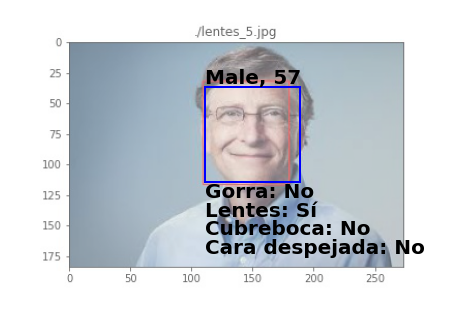

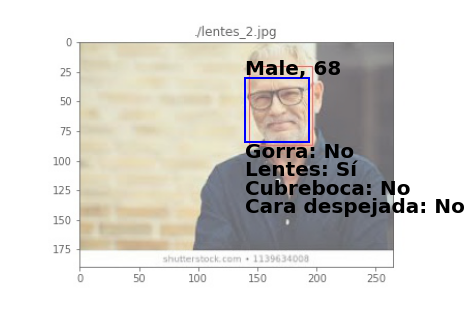

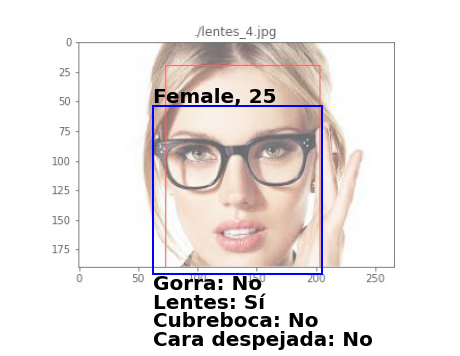

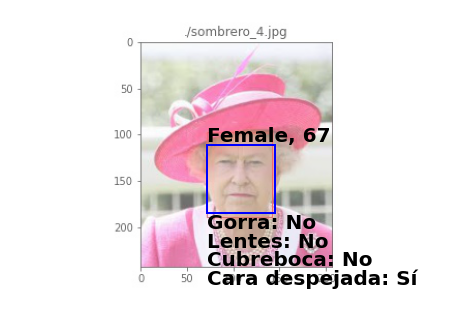

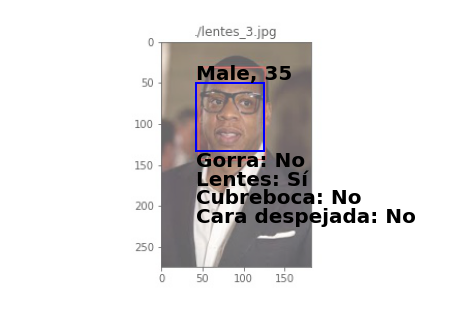

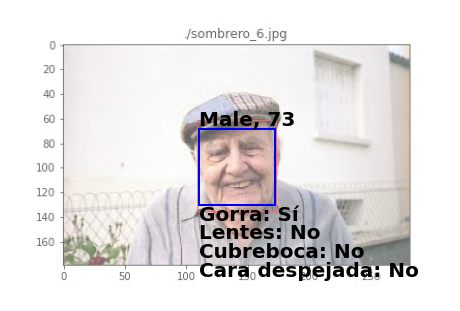

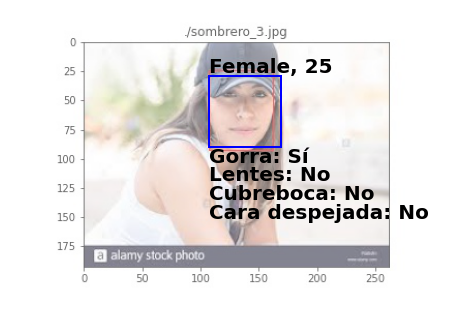

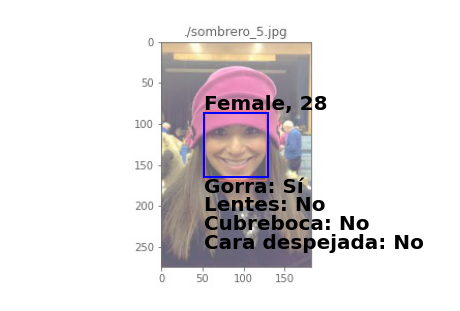

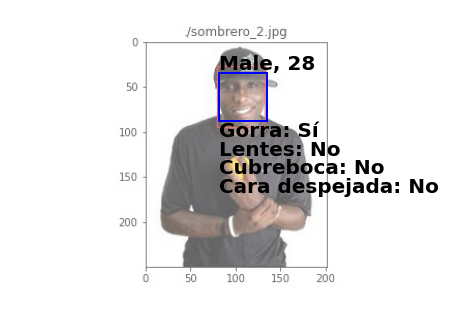

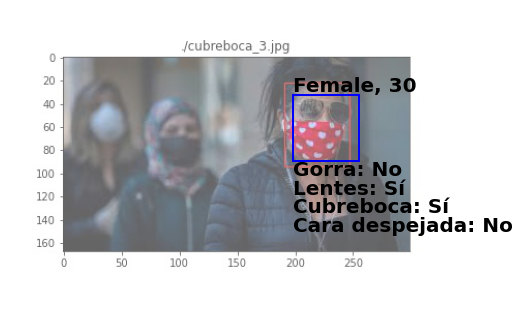

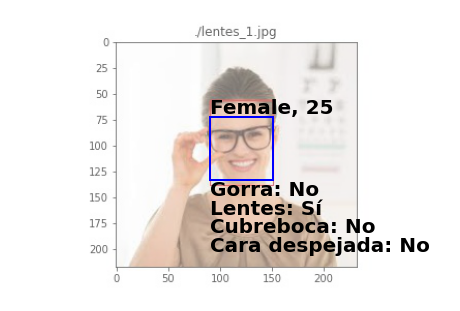

In [44]:
directory='./'
kind='*.jpg'
files=glob(directory+kind)
count=0
for image_name in files:
  response = requests.post(face_api_url, params=params, headers=headers, data = open('./'+image_name, 'rb').read())
  faces = response.json()
  #HTML("<font size=5>Detected <font color='blue'>%d</font> faces in the image</font>"%len(faces))
  #print(faces)

  if len(faces)>0:
    image = Image.open('./'+image_name)
    print('Encontré rostro(s) en '+image_name)
    print(faces)
    #print(json.dumps(faces, indent=4, sort_keys=True))
    print()
    plt.figure(figsize=(8,8))
    ax = plt.imshow(image, alpha=0.6)
    for face in faces:
      fr = face["faceRectangle"]
      fa = face["faceAttributes"]
      #print(fa)
      origin = (fr["left"], fr["top"])
      p = patches.Rectangle(origin, fr["width"], fr["height"], fill=False, linewidth=2, color='b')
      ax.axes.add_patch(p)
      gorra='No'
      lentes='No'
      cubreboca='No'
      for elements in fa['accessories']:
        if elements['type']=='headwear':
          gorra='Sí'
        if elements['type']=='glasses':
          lentes='Sí'
        if elements['type']=='mask':
          cubreboca='Sí'
      oc=fa['occlusion']
      oclusion='Sí'
      if oc['foreheadOccluded'] or oc['eyeOccluded'] or oc['mouthOccluded'] or lentes=='Sí':
        oclusion='No'
      plt.text(origin[0], origin[1], "%s, %d"%(fa["gender"].capitalize(), fa["age"]), fontsize=20, weight="bold", va="bottom")
      plt.text(origin[0], origin[1]+fr["height"]+12*1.5, "Gorra: %s"%(gorra), fontsize=20, weight="bold", va="bottom")
      plt.text(origin[0], origin[1]+fr["height"]+24*1.5, "Lentes: %s"%(lentes), fontsize=20, weight="bold", va="bottom")
      plt.text(origin[0], origin[1]+fr["height"]+36*1.5, "Cubreboca: %s"%(cubreboca), fontsize=20, weight="bold", va="bottom")
      plt.text(origin[0], origin[1]+fr["height"]+48*1.5, "Cara despejada: %s"%(oclusion), fontsize=20, weight="bold", va="bottom")
      _ = plt.axis("off")
    #plt.savefig('./pred_'+os.path.basename(image_name))